In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea

In [2]:
training_df= pd.read_table("C:/Users/gianl/Desktop/working_directory/LB2/project/datat_analysis/training_set_parsed.tsv")
benchmarking_df=pd.read_table("C:/Users/gianl/Desktop/working_directory/LB2/project/datat_analysis/benchmarking_set_parsed.tsv")
training_df

,Accession code,SP length,Length,Kingdom,Species,Sequence
0,Q6ASY2,26.0,178,Viridiplantae,Oryza sativa,MAVAARAAAVACLLVVGLAAVAGVDGATASSPAPAPAVDCTAEALK...
1,Q8VCS0,22.0,530,Metazoa,Mus musculus,MKAWGALWIVLGLLLWPEPGAASSLPLLMDSIIQALAELEQKVPVT...
2,Q9NSA1,28.0,209,Metazoa,Homo sapiens,MDSDETGFEHSGLWVSVLAGLLLGACQAHPIPDSSPLLQFGGQVRQ...
3,P18417,31.0,352,Viridiplantae,Catharanthus roseus,MANFSESKSMMAVFFMFFLLLLSSSSSSSSSSPILKKIFIESPSYA...
4,Q8C1Q4,21.0,291,Metazoa,Mus musculus,MLVATLLCALCCGLLAASAHAGYSEDRCSWRGSGLTQEPGSVGQLT...
...,...,...,...,...,...,...
8487,Q9BSI4,NaN,451,Metazoa,Homo sapiens,MATPLVAGPAALRFAAAASWQVVRGRCVEHFPRVLEFLRSLRAVAP...
8488,Q9NZZ3,NaN,219,Metazoa,Homo sapiens,MNRLFGKAKPKAPPPSLTDCIGTVDSRAESIDKKISRLDAELVKYK...
8489,P38783,NaN,130,Fungi,Saccharomyces cerevisiae,MIPSRISHKFPLFLRSSLAAPKAAYRFSSTIPKPSDQVPDVDAFLN...
8490,Q12018,NaN,815,Fungi,Saccharomyces cerevisiae,MSETLPRSDDLEATWNFIEPGINQILGNEKNQASTSKRVYKILSPT...


In [3]:
colors_tr = ['#0C2067','#023E8A','#0077B6','#0096C7', '#00B4D8','#46CAE4', '#90E0EF', '#ADE8F4','#CAF0F8','#E4F1F8', '#F3F1F8']
colors_bm= ['#6A040F','#9D0208','#D00000','#DC2F02', '#E85D04','#F48C06', '#FAA307', '#FFBA08','#FFD80B','#FFE90B', '#FFFF00']

colors_tr_pie=['#0096C7', '#00B4D8','#46CAE4', '#90E0EF']
colors_bm_pie=['#D00000','#DC2F02', '#E85D04','#F48C06']
colors_tr_r = ['#CAF0F8','#CAF0F8','#CAF0F8','#CAF0F8', '#0C2067','#0C2067', '#0C2067', '#0C2067','#0C2067']
colors_bm_r = ['#FFE90B','#FFE90B','#FFE90B','#FFE90B', '#6A040F','#6A040F', '#6A040F', '#6A040F','#6A040F','#FFE90B']


# SP length length

In [4]:
training_df["SP length"].describe()

count    874.000000
mean      22.861556
std        5.585762
min       13.000000
25%       19.000000
50%       22.000000
75%       25.000000
max       55.000000
Name: SP length, dtype: float64

In [5]:
benchmarking_df["SP length"].describe()

count    219.000000
mean      23.150685
std        6.226618
min       15.000000
25%       19.000000
50%       22.000000
75%       25.000000
max       64.000000
Name: SP length, dtype: float64

In [4]:
training_df["SP length log10"]=np.log10(training_df["SP length"])
benchmarking_df["SP length log10"]=np.log10(benchmarking_df["SP length"])

### Histograms 

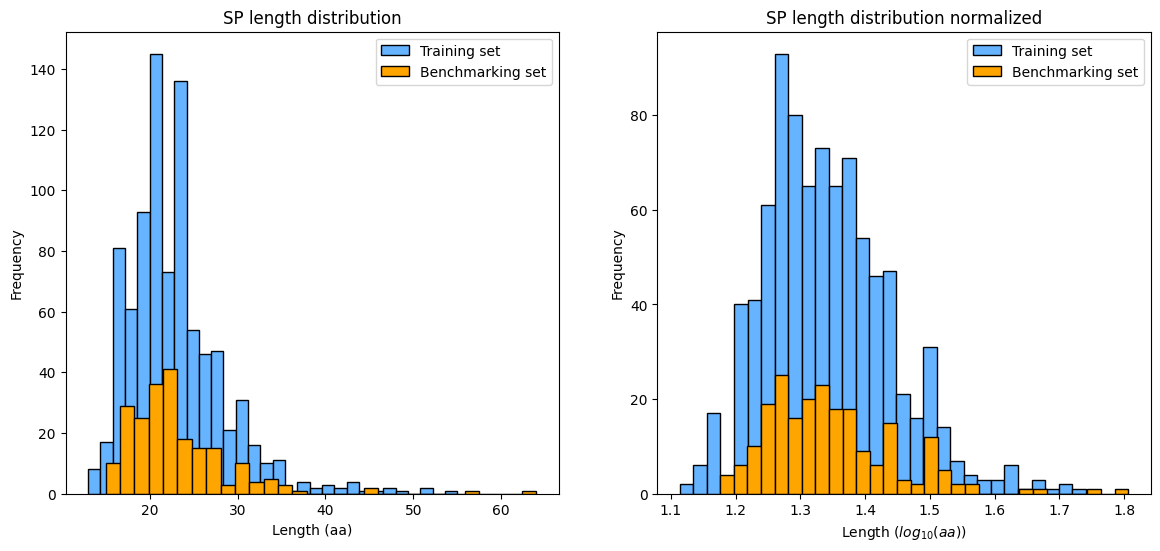

In [7]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.hist(training_df["SP length"], color = '#66b3ff', ec="black", bins=30)
plt.hist(benchmarking_df["SP length"], color= "orange", ec="black",bins=30)
plt.xlabel("Length (aa)")
plt.ylabel("Frequency")
plt.title("SP length distribution")
plt.legend(["Training set","Benchmarking set"])

plt.subplot(1,2,2)
plt.hist(training_df["SP length log10"], color = '#66b3ff', ec="black", bins=30)
plt.hist(benchmarking_df["SP length log10"], color= "orange", ec="black",bins=30)
plt.xlabel("Length ($log_{10}(aa)$)")
plt.ylabel("Frequency")
plt.title("SP length distribution normalized")
plt.legend(["Training set","Benchmarking set"])


plt.show()


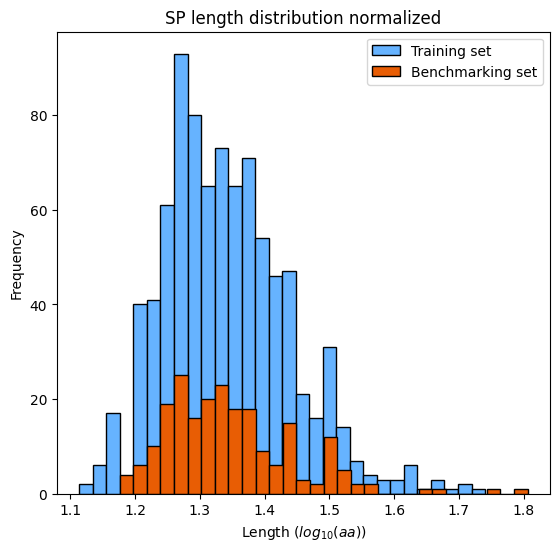

In [19]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,2)
plt.hist(training_df["SP length log10"], color = '#66b3ff', ec="black", bins=30)
plt.hist(benchmarking_df["SP length log10"], color= "#E85D04", ec="black",bins=30)
plt.xlabel("Length ($log_{10}(aa)$)")
plt.ylabel("Frequency")
plt.title("SP length distribution normalized")
plt.legend(["Training set","Benchmarking set"])


plt.show()

In [8]:
training_df["SP length"].dropna().value_counts().count()

36

In [9]:
box_df=pd.DataFrame(training_df["SP length"].value_counts().sort_index())

### Plot

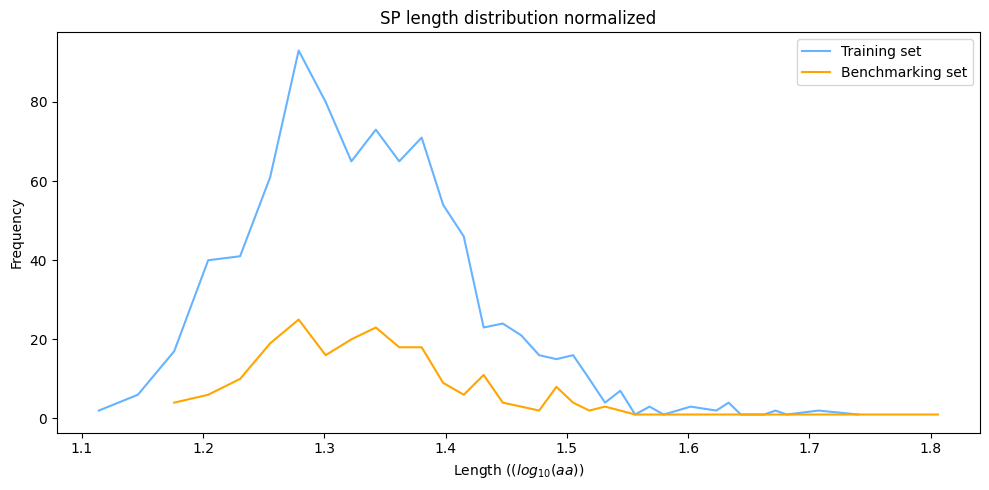

In [10]:
plt.figure(figsize=(10,5))

plt.plot(training_df["SP length log10"].value_counts().sort_index(), color = '#66b3ff')
plt.plot(benchmarking_df["SP length log10"].value_counts().sort_index(), color= "orange")

plt.xlabel("Length (($log_{10}(aa)$)")
plt.ylabel("Frequency")
plt.title("SP length distribution normalized")
plt.legend(["Training set","Benchmarking set"])
plt.tight_layout()
plt.show()

### Density plots

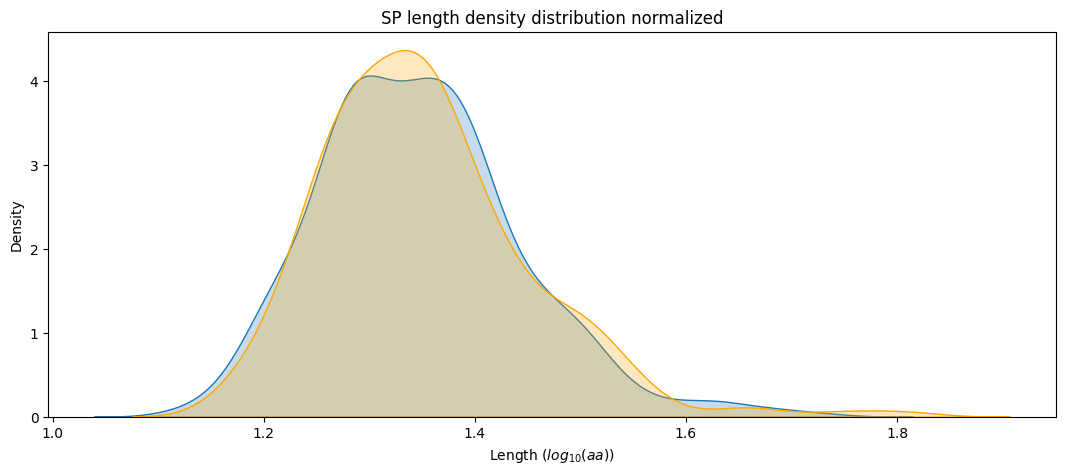

In [11]:
plt.figure(figsize=(13,5))

sea.kdeplot(training_df["SP length log10"], fill=True )

sea.kdeplot(benchmarking_df["SP length log10"], fill=True, color="Orange")
plt.xlabel("Length ($log_{10}(aa)$)")
plt.ylabel("Density")
plt.title("SP length density distribution normalized")

plt.show()

# Proteins length (with and without SP)

### Histograms

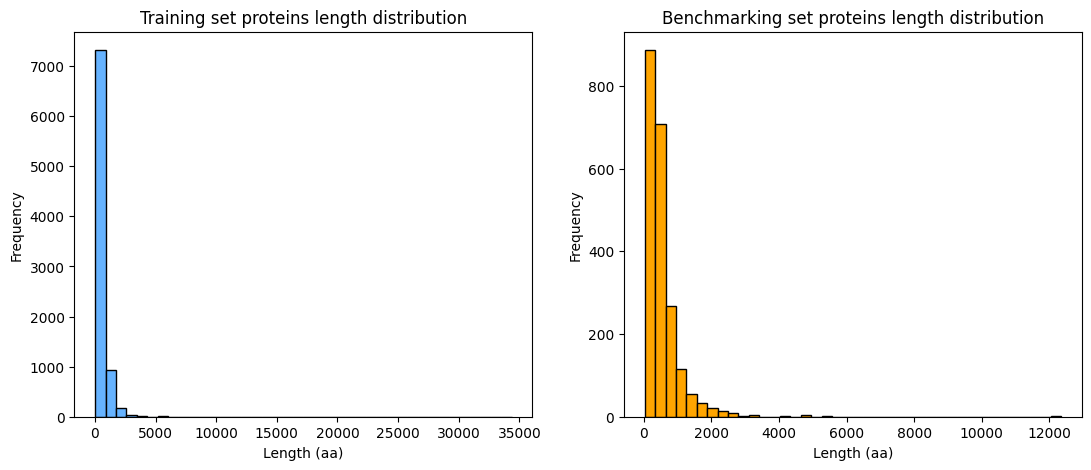

In [5]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.hist(training_df["Length"], color = '#66b3ff', ec="black", bins=40)
plt.xlabel("Length (aa)")
plt.ylabel("Frequency")
plt.title("Training set proteins length distribution")

plt.subplot(1,2,2)
plt.hist(benchmarking_df["Length"], color= "orange", ec="black",bins=40)
plt.xlabel("Length (aa)")
plt.ylabel("Frequency")
plt.title("Benchmarking set proteins length distribution")

plt.show()

### Value transformation and creation of new columns in df

In [6]:
#turn the length values into logarithm for better visualization
training_df["Length log10"]=np.log10(training_df["Length"])
benchmarking_df["Length log10"]=np.log10(benchmarking_df["Length"])

# Define a function to assign class values
def assign_class(row):
    if np.isnan(row['SP length']):
        return "Negative"
    else:
        return "Positive"

# Apply the function to create the "Class" column
training_df['Class'] = training_df.apply(assign_class, axis=1)
benchmarking_df['Class'] = benchmarking_df.apply(assign_class, axis=1)

### Wisker plots

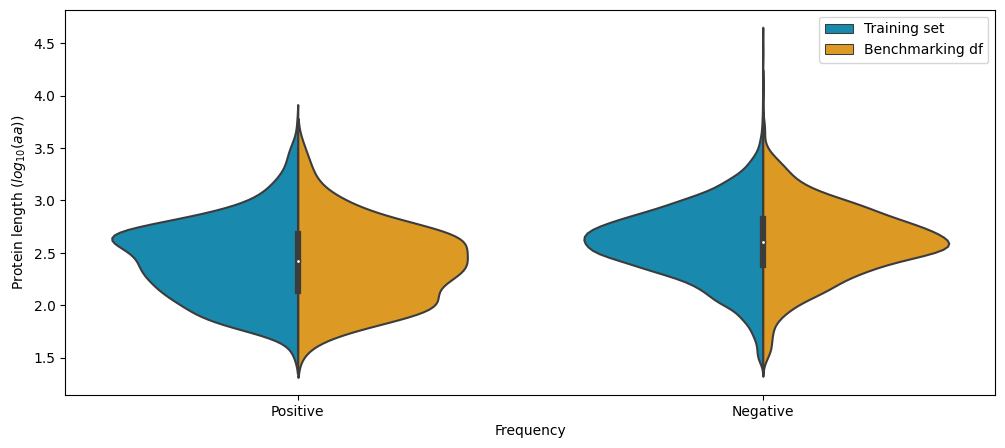

In [16]:
combined_df=pd.concat([training_df.assign(Dataframe="Training set"), benchmarking_df.assign(Dataframe="Benchmarking df")])

plt.figure(figsize=(12,5))
sea.violinplot(data=combined_df, x="Class", y="Length log10", hue="Dataframe", split=True, palette=(colors_tr[3],colors_bm[6]))
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Protein length ($log_{10}(aa)$)")
plt.show()

### Histograms

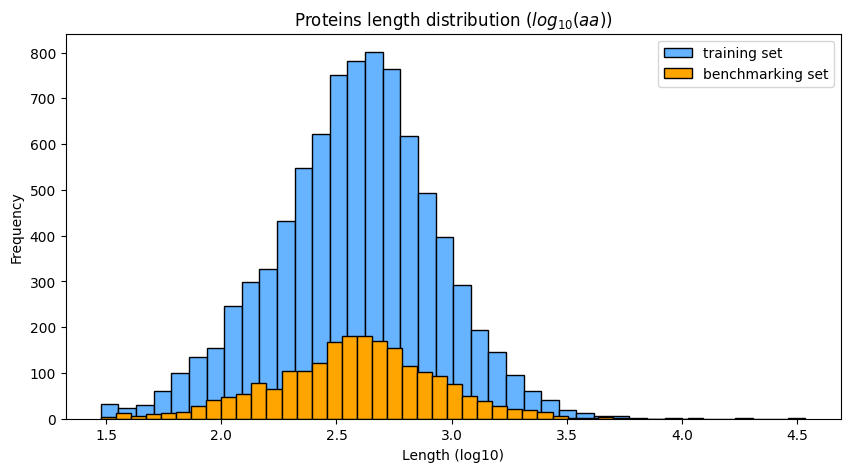

In [17]:
plt.figure(figsize=(10,5))
plt.hist(training_df["Length log10"], color = '#66b3ff', ec="black", bins=40)
plt.hist(benchmarking_df["Length log10"], color= "orange", ec="black",bins=40)
plt.xlabel("Length (log10)")
plt.ylabel("Frequency")

plt.title("Proteins length distribution ($log_{10}(aa)$)")
plt.legend(["training set","benchmarking set"])
plt.grid(visible=False)
plt.show()

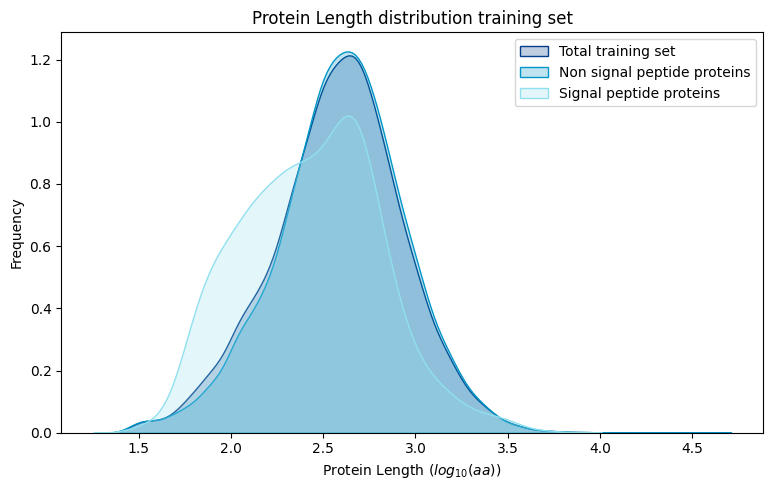

In [13]:

class_0_df = training_df[training_df['Class'] == "Negative"]
class_1_df = training_df[training_df['Class'] == "Positive"]
class_0_df_b = benchmarking_df[benchmarking_df['Class'] == "Negative"]
class_1_df_b = benchmarking_df[benchmarking_df['Class'] == "Positive"]
# Create two separate plots for each class
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sea.kdeplot(training_df["Length log10"], color=colors_tr[1], fill=True)
# Plot for Class 0

sea.kdeplot(class_0_df['Length log10'].dropna(), color=colors_tr[3], fill=True)

# Plot for Class 1

sea.kdeplot(class_1_df['Length log10'].dropna(), color=colors_tr[6], fill=True)

plt.title('Protein Length distribution training set')
plt.xlabel('Protein Length ($log_{10}(aa)$)')
plt.ylabel('Frequency')
plt.legend(["Total training set", "Non signal peptide proteins", "Signal peptide proteins"])

plt.tight_layout()
plt.show()


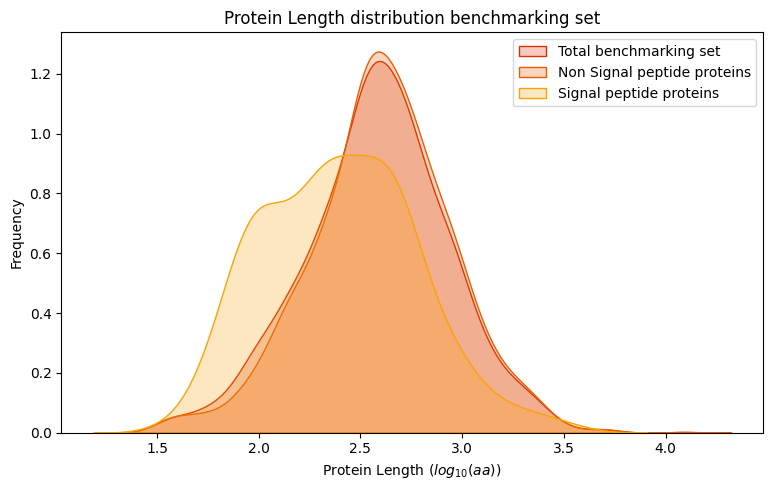

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sea.kdeplot(benchmarking_df["Length log10"], color=colors_bm[3], fill=True)
# Plot for Class 0

sea.kdeplot(class_0_df_b['Length log10'].dropna(), color=colors_bm[4], fill=True)

# Plot for Class 1

sea.kdeplot(class_1_df_b['Length log10'].dropna(), color=colors_bm[6], fill=True)

plt.title('Protein Length distribution benchmarking set')
plt.xlabel('Protein Length ($log_{10}(aa)$)')
plt.ylabel('Frequency')
plt.legend(["Total benchmarking set", "Non Signal peptide proteins", "Signal peptide proteins"])
plt.tight_layout()
plt.show()

In [26]:
class_1_df["Length"].describe()

count     874.000000
mean      398.550343
std       449.309283
min        35.000000
25%       138.250000
50%       279.000000
75%       490.250000
max      5263.000000
Name: Length, dtype: float64

In [27]:
class_0_df["Length"].describe()

count     7618.000000
mean       546.043844
std        697.664731
min         30.000000
25%        242.000000
50%        405.000000
75%        663.000000
max      34350.000000
Name: Length, dtype: float64

In [28]:
class_0_df_b["Length"].describe()

count     1905.000000
mean       549.241470
std        566.011718
min         30.000000
25%        248.000000
50%        406.000000
75%        663.000000
max      12345.000000
Name: Length, dtype: float64

In [29]:
class_1_df_b["Length"].describe()

count     219.000000
mean      368.255708
std       418.799232
min        37.000000
25%       117.000000
50%       248.000000
75%       453.000000
max      3380.000000
Name: Length, dtype: float64

# Taxonomic classification (at kingdom and species levels)

### Pie charts

In [54]:
kingdom_numbers_bm=pd.DataFrame(benchmarking_df["Kingdom"].value_counts())
kingdom_numbers_tr=pd.DataFrame(training_df["Kingdom"].value_counts())


#### Pie charts kingdoms

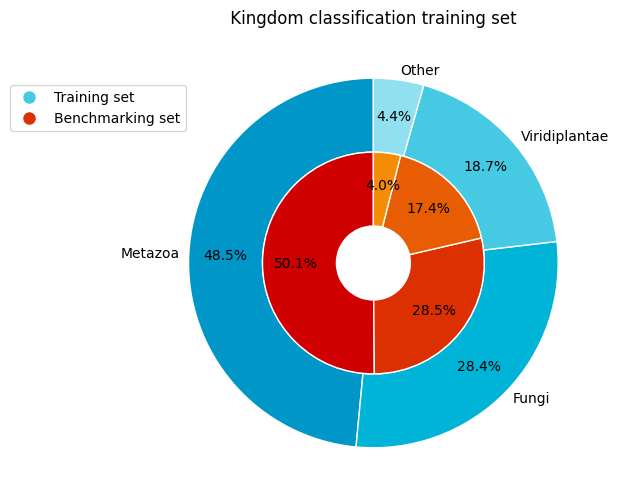

In [55]:

plt.figure(figsize=(12,6))

explode = (0.00,0.00,0.00,0.00)
plt.title(" Kingdom classification benchmarking set")

plt.pie(kingdom_numbers_tr["Kingdom"], labels=kingdom_numbers_tr.index,radius=1, labeldistance=1.05 ,shadow=False, autopct="%.1f%%", colors=colors_tr_pie,  wedgeprops=dict(width=0.4, edgecolor='White'), startangle=90,pctdistance=0.8, explode=explode, textprops={'color':'Black'})
plt.pie(kingdom_numbers_bm["Kingdom"], radius=0.6, shadow=False, autopct="%.1f%%", colors=colors_bm_pie, wedgeprops=dict(width=0.4, edgecolor='White'), startangle=90,pctdistance=0.7, explode=explode, textprops={'color':'Black'} )

property_colors={
    'Training set': "#46CAE4",
    'Benchmarking set': "#DC2F02",
    }
legend_labels = {color: property for property, color in property_colors.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                  for color, label in legend_labels.items()]
plt.legend(handles=legend_handles,  bbox_to_anchor=(0.11,0.9))

plt.title(" Kingdom classification training set ")
plt.show()

#### Pie charts species

In [56]:
# Count the frequency of each species
species_counts_tr = training_df['Species'].value_counts()
species_counts_bm = benchmarking_df['Species'].value_counts()

# Get the top 10 most frequent species
top_10_species_tr = species_counts_tr.head(8)
top_10_species_bm = species_counts_bm.head(8)
# Group all other species into an "other species" category
other_species_count_tr = species_counts_tr[9:].sum()
top_10_species_tr['Other Species'] = other_species_count_tr
other_species_count_bm = species_counts_bm[9:].sum()
top_10_species_bm['Other Species'] = other_species_count_bm

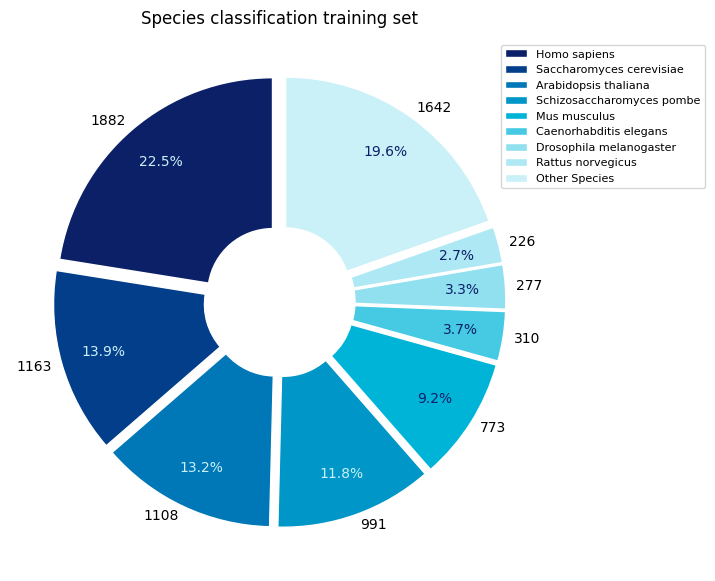

In [57]:
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

fig,ax=plt.subplots(figsize=(14, 7))
patches, texts, autotexts = ax.pie(top_10_species_tr, labels=top_10_species_tr, labeldistance=1.05, autopct='%1.1f%%', startangle=90, colors=colors_tr,pctdistance=0.8, wedgeprops=dict(width=0.7, edgecolor='White'), explode=explode)
plt.title('Species classification training set')

for i in range (0,len(autotexts)):
    autotexts[i].set_color(colors_tr_r[i])
    

plt.legend( labels=top_10_species_tr.index, bbox_to_anchor=(0.9, 0.7), fontsize=8)
plt.show()

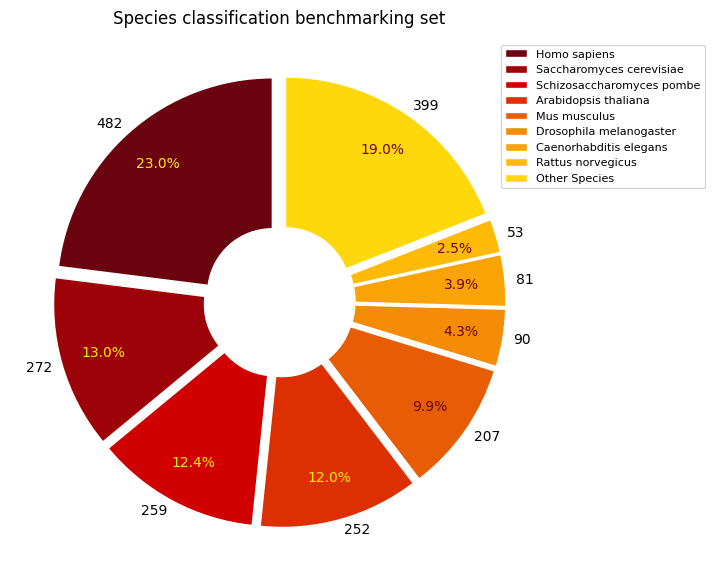

In [58]:

explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

fig,ax=plt.subplots(figsize=(14, 7))
patches, texts, autotexts = ax.pie(top_10_species_bm, labels=top_10_species_bm, labeldistance=1.05,  autopct='%1.1f%%', startangle=90, colors=colors_bm,pctdistance=0.8, wedgeprops=dict(width=0.7, edgecolor='White'), explode=explode)
plt.title('Species classification benchmarking set')

for i in range (0,len(autotexts)):
    autotexts[i].set_color(colors_bm_r[i])
    

plt.legend( labels=top_10_species_bm.index, bbox_to_anchor=(0.9, 0.7), fontsize=8)
plt.show()


### Histograms

<function matplotlib.pyplot.show(close=None, block=None)>

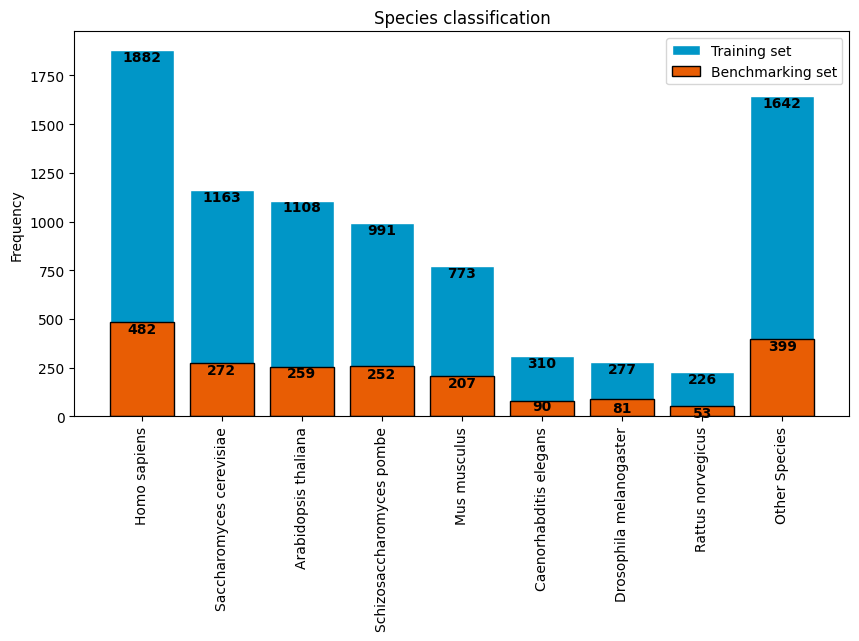

In [59]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(top_10_species_tr.index, top_10_species_tr, ec="white", color=colors_tr_pie[0])
plt.xticks(rotation='vertical')
values=top_10_species_tr.values
for i, value in enumerate(values):
    ax.text(i, value, str(value), ha='center', va='top', weight='bold')

ax.bar(top_10_species_bm.index, top_10_species_bm,ec="black", color=colors_bm_pie[2])
plt.xticks(rotation='vertical')
plt.ylabel("Frequency")
values=top_10_species_bm.values
for i, value in enumerate(values):
    ax.text(i, value, str(value), ha='center', va='top', weight='bold')

plt.legend(["Training set", "Benchmarking set"])
ax.set_title("Species classification")
plt.show

# Amino acid composition distribution

### Sequences recover

In [60]:
tr_entr_SP=training_df.loc[training_df["Class"]=="Positive"]
bm_entr_SP=benchmarking_df.loc[benchmarking_df["Class"]=="Positive"]


### aminoacidic composition

In [61]:
def SP_cleavage (dataframe, fn):
    out=open("C:/Users/gianl/Desktop/working_directory/LB2/project/datat_analysis/%s"%fn,"w")
    aminoacid_composition={}
    for i, line in dataframe.iterrows():
        if i!=0:
            length=int(line[1])
            signal_peptide=line[5][0:length]
            cleavage_site=line[5][(length-13):(length+2)]
            name=line[0]
            for aa in "GAVPLIMFWYSTCNQHDEKR":
                if aa!="X":
                    aminoacid_composition[aa] = aminoacid_composition.get(aa, 0) + signal_peptide.count(aa)
            out.write(">"+str(name)+"\n"+str(cleavage_site)+"\n")
    out.close()    
    return aminoacid_composition

def percentagetor(dictionary):
    tot=0
    for aa in dictionary:
        tot+=dictionary[aa]
    for bb in dictionary:
        dictionary[bb]=float(dictionary[bb]*100)/tot
    return dictionary                                      

In [62]:
aminoacid_composition_tr=SP_cleavage(tr_entr_SP, "tr_MSA")   
sorted_aminoacid_composition_tr= percentagetor(aminoacid_composition_tr)
aminoacid_composition_bm=SP_cleavage(bm_entr_SP, "bm_MSA")
sorted_aminoacid_composition_bm= percentagetor(aminoacid_composition_bm)

swiss_composition={ "G" :7.07,"A": 8.25, "V" :6.85, "P": 4.74, "L": 9.65, "I": 5.91, "M" :2.41, "F" :3.86, "W" :1.10,"Y": 2.92,"S": 6.65, "T" :5.36,"C": 1.38, "N": 4.06, "Q": 3.93, "H": 2.27, "D": 5.46, "E": 6.72, "K": 5.80, "R": 5.53}

### Bar plot aminoacidic composition vs swiss prot distribution

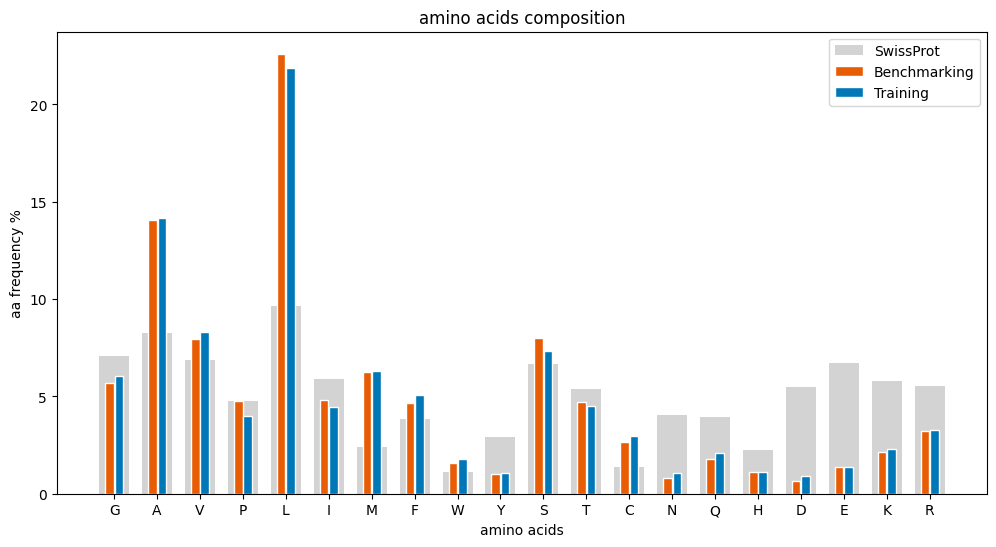

In [63]:
categories = list(swiss_composition.keys())
b_counts = list(aminoacid_composition_bm.values())
t_counts = list(aminoacid_composition_tr.values())
s_counts = list(swiss_composition.values())
#print(b_counts)

X_axis = np.arange(len(categories))

plt.figure(figsize=(12,6))

plt.bar(X_axis + 0, s_counts, width=0.7, color="lightgrey")
plt.bar(X_axis - 0.11, b_counts, width=0.2, color=colors_bm[4], ec="white")
plt.bar(X_axis + 0.11, t_counts, width=0.2, color=colors_tr[2], ec="white")

plt.xticks(X_axis, categories)
plt.xlabel("amino acids")
plt.ylabel("aa frequency %")
plt.title("amino acids composition")
plt.legend(["SwissProt","Benchmarking","Training"])
plt.show()


### Pie plot aminoacidic composition vs swiss prot distribution

In [64]:
swiss_composition_df=pd.DataFrame( swiss_composition.values(),swiss_composition.keys())
amminoacid_composition_tr_df=pd.DataFrame(sorted_aminoacid_composition_tr.values(),sorted_aminoacid_composition_tr.keys())
amminoacid_composition_bm_df=pd.DataFrame(sorted_aminoacid_composition_bm.values(),sorted_aminoacid_composition_bm.keys())

In [65]:
amminoacid_comp_tot={}
for en in sorted_aminoacid_composition_bm:
    amminoacid_comp_tot[en]=(float(sorted_aminoacid_composition_bm[en])+float(sorted_aminoacid_composition_tr[en]))
for aa in amminoacid_comp_tot:
    amminoacid_comp_tot[aa]= (amminoacid_comp_tot[aa]*100)/200

amino_acid_properties = [
    'Hydrophobic',
    'Hydrophobic',
    'Hydrophobic',
    'Hydrophobic',
    'Hydrophobic',
    'Hydrophobic',
    'Hydrophobic',
    'Polar',
    'Polar',
    'Polar',
    'Polar',
    'Polar',
    'Polar',
    'Polar',
    'Polar',
    'Polar',
    'Negative Charged',
    'Negative Charged',
    'Positive Charged',
    'Positive Charged']    
amminoacid_comp_tot_df=pd.DataFrame(amminoacid_comp_tot.values(),amminoacid_comp_tot.keys())
cmap=plt.colormaps["tab20c"]    
colors_tot=property_colors_tot = {
    'Hydrophobic': cmap([2]),
    'Polar': cmap([10]),
    'Negative Charged': cmap([6]),
    'Positive Charged': cmap([14]),
    }

amminoacid_comp_tot_df=amminoacid_comp_tot_df.assign(property=amino_acid_properties)
amminoacid_comp_tot_df['Color'] = amminoacid_comp_tot_df['property'].map(property_colors_tot)


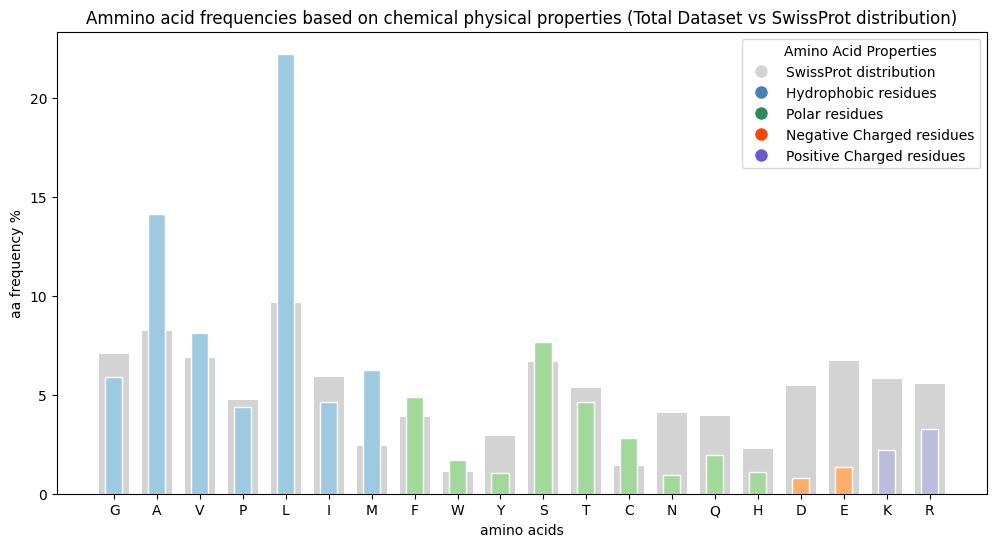

In [66]:
categories = list(swiss_composition.keys())
b_counts = list(amminoacid_comp_tot.values())
s_counts = list(swiss_composition.values())
#print(b_counts)

X_axis = np.arange(len(categories))

plt.figure(figsize=(12,6))

plt.bar(X_axis + 0, s_counts, width=0.7, color="lightgrey")
plt.bar(X_axis -0.01, b_counts, width=0.4, color=amminoacid_comp_tot_df['Color'], ec="white")

plt.xticks(X_axis, categories)
plt.xlabel("amino acids")
plt.ylabel("aa frequency %")
plt.title("Ammino acid frequencies based on chemical physical properties (Total Dataset vs SwissProt distribution)")

property_colors={
    'SwissProt distribution': "lightgrey",
    'Hydrophobic residues': "steelblue",
    'Polar residues': "seagreen",
    'Negative Charged residues': "orangered",
    'Positive Charged residues': "slateblue",
    }

legend_labels = {color: property for property, color in property_colors.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                  for color, label in legend_labels.items()]
plt.legend(handles=legend_handles, title='Amino Acid Properties',  bbox_to_anchor=(1, 1))
plt.show()


In [67]:
amino_acid_properties = [
    'Hydrophobic',
    'Hydrophobic',
    'Hydrophobic',
    'Hydrophobic',
    'Hydrophobic',
    'Hydrophobic',
    'Hydrophobic',
    'Polar',
    'Polar',
    'Polar',
    'Polar',
    'Polar',
    'Polar',
    'Polar',
    'Polar',
    'Polar',
    'Negative Charged',
    'Negative Charged',
    'Positive Charged',
    'Positive Charged']

In [68]:

cmap=plt.colormaps["tab20c"]
colors_sw=property_colors_sw = {
    'Hydrophobic': cmap([0]),
    'Polar': cmap([8]),
    'Negative Charged': cmap([4]),
    'Positive Charged': cmap([12])
    }
colors_tr=property_colors_tr = {
    'Hydrophobic': cmap([1]),
    'Polar': cmap([9]),
    'Negative Charged': cmap([5]),
    'Positive Charged': cmap([13]),
    }
colors_bm=property_colors_bm = {
    'Hydrophobic': cmap([2]),
    'Polar': cmap([10]),
    'Negative Charged': cmap([6]),
    'Positive Charged': cmap([14]),
    }

swiss_composition_df_prop=swiss_composition_df.assign(property=amino_acid_properties)
swiss_composition_df_prop['Color'] = swiss_composition_df_prop['property'].map(property_colors_sw)
df=swiss_composition_df_prop
df["AA"]=swiss_composition_df_prop.index
df = swiss_composition_df_prop.reset_index(drop=True)

amminoacid_composition_tr_df_prop=amminoacid_composition_tr_df.assign(property=amino_acid_properties)
amminoacid_composition_tr_df_prop['Color'] = amminoacid_composition_tr_df_prop['property'].map(property_colors_tr)
df1=amminoacid_composition_tr_df_prop
df1["AA"]=amminoacid_composition_tr_df_prop.index
df1 = amminoacid_composition_tr_df_prop.reset_index(drop=True)

amminoacid_composition_bm_df_prop=amminoacid_composition_bm_df.assign(property=amino_acid_properties)
amminoacid_composition_bm_df_prop['Color'] = amminoacid_composition_bm_df_prop['property'].map(property_colors_bm)
df2=amminoacid_composition_bm_df_prop
df2["AA"]=amminoacid_composition_bm_df_prop.index
df2 = amminoacid_composition_bm_df_prop.reset_index(drop=True)

property_colors={
    'Hydrophobic': "steelblue",
    'Polar': "seagreen",
    'Negative Charged': "orangered",
    'Positive Charged': "slateblue",
    }


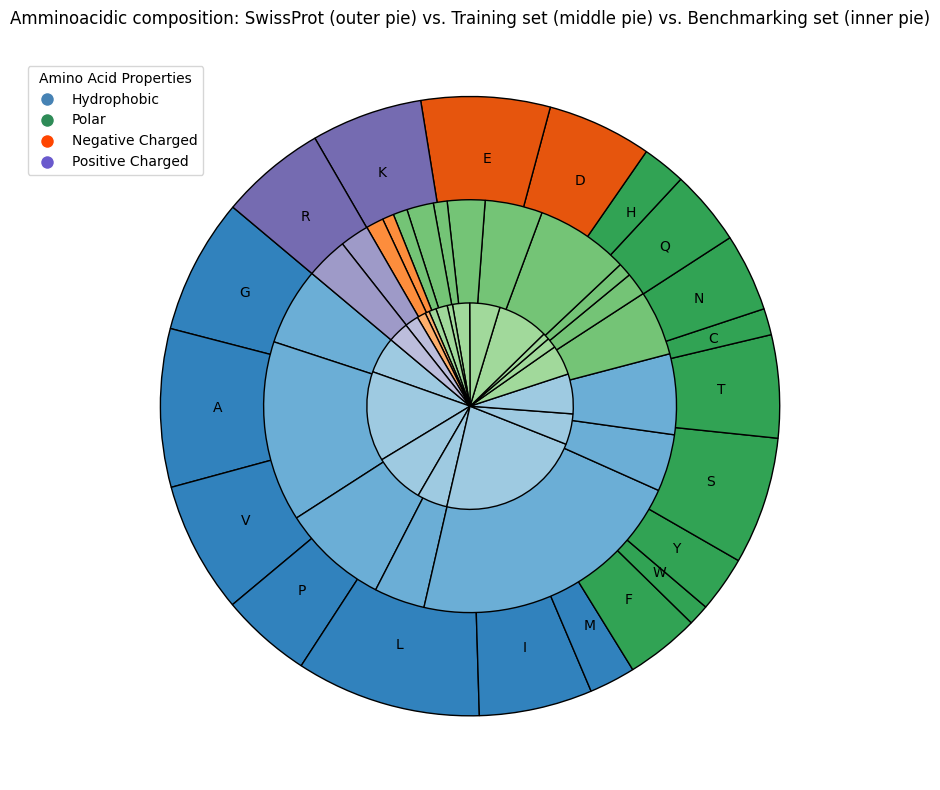

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.axis('equal')
outerpie=ax.pie(df[0], radius=1.2 ,labels=swiss_composition_df_prop.index, labeldistance=0.8, colors=df['Color'], startangle=140, wedgeprops=dict(width=0.5, edgecolor='Black'),pctdistance=0.8,  textprops={'fontsize':10})
innerpie=ax.pie(df1[0], radius=0.8, colors=df1['Color'], startangle=140, wedgeprops=dict( width=0.5,edgecolor='Black'),pctdistance=0.8,  textprops={'fontsize':7})
innerinnerpie=ax.pie(df2[0], radius=0.4, colors=df2['Color'], startangle=140, wedgeprops=dict( edgecolor='Black'),pctdistance=0.8,  textprops={'fontsize':7})
plt.title('Amminoacidic composition: SwissProt (outer pie) vs. Training set (middle pie) vs. Benchmarking set (inner pie)')


legend_labels = {color: property for property, color in property_colors.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                  for color, label in legend_labels.items()]
plt.legend(handles=legend_handles, title='Amino Acid Properties',  bbox_to_anchor=(0.1, 0.8))
plt.tight_layout()
plt.show()

## Training set sequence logo cleavage site

![Alt text](image.png)

## Benchmarking set sequence logo cleavage site

![Alt text](image-1.png)